# Histogram Matching

Sometimes the overhead imagery might have substantial visual apperances due to various reasons.

In [1]:
import sys
sys.path.append(r'/home/lab/Documents/bohao/code/mrs')

In [2]:
%matplotlib inline
import numpy as np
from mrs_utils import misc_utils, vis_utils

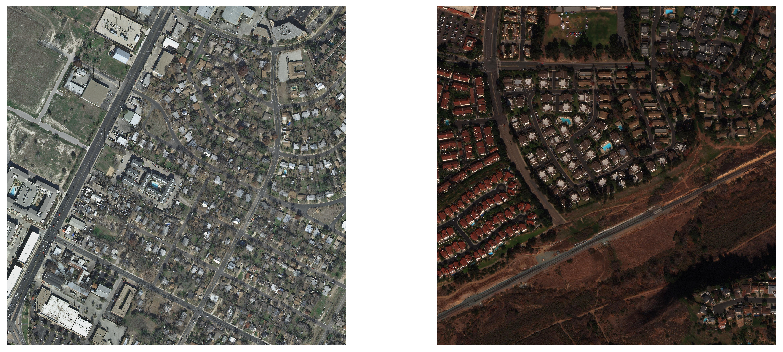

In [3]:
source_files = misc_utils.get_files([r'/media/ei-edl01/data/uab_datasets/Austin/data/Original_Tiles'], '*_RGB.tif')
target_files = misc_utils.get_files(['/media/ei-edl01/user/bh163/lbnl/dataset'], '*.jpg')
np.random.seed(0)
vis_utils.compare_figures([misc_utils.load_file(np.random.choice(source_files, 1)[0]), 
                           misc_utils.load_file(np.random.choice(target_files, 1)[0])], 
                         (1, 2), fig_size=(12, 5))

An easy solution to align those images is to do [histogram matching](http://paulbourke.net/miscellaneous/equalisation/): 

## [Histogram Matcher](../data/hist_match.py)

100%|██████████| 3/3 [00:09<00:00,  3.07s/it]


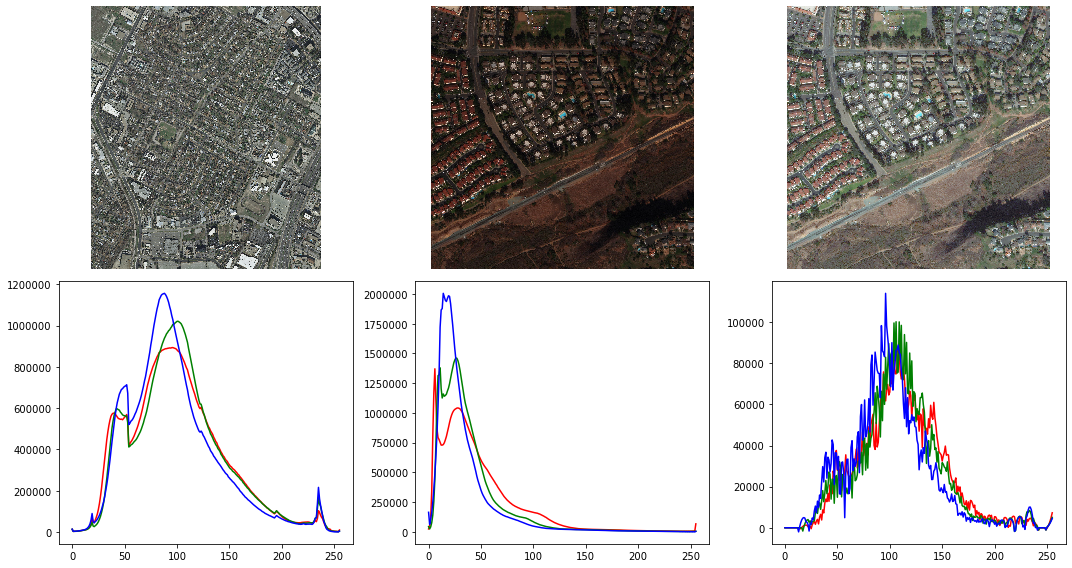

In [4]:
from data import hist_match

np.random.seed(0)
hm = hist_match.HistMatcher(source_files)
hm.vis_transform_pair(target_files)

The image after histogram matching (right) has higher intensity for all RGB channels and it is visually similar to the source imagery now.

_HistMatcher_ also has a _match_target_images()_ method that creates a generator and yield transformed target images one at a time.

Before Transform


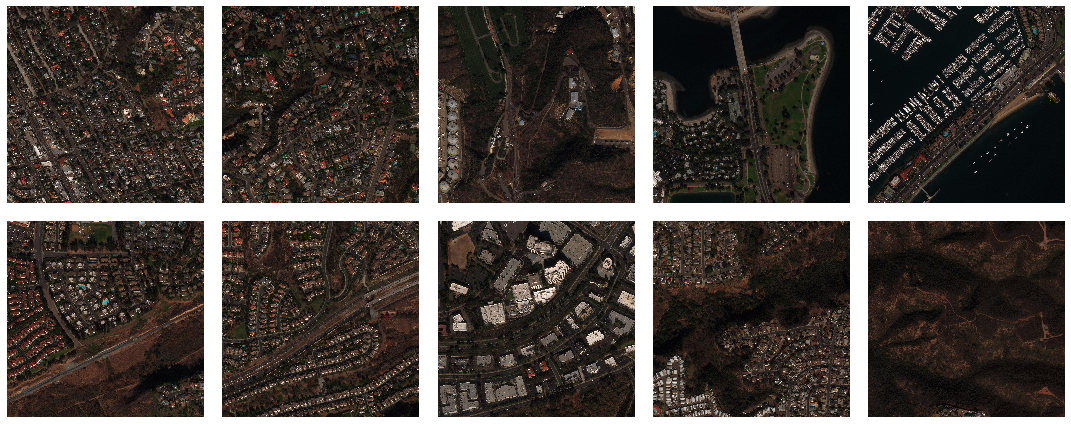

In [5]:
print('Before Transform')
vis_utils.compare_figures([misc_utils.load_file(a) for a in target_files], (2, 5), fig_size=(15, 6))

After Transform


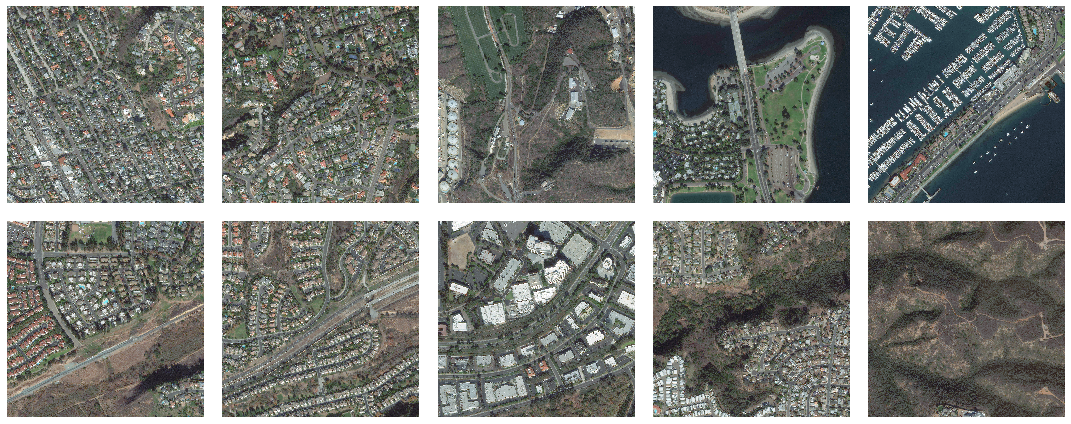

In [6]:
print('After Transform')
vis_utils.compare_figures([a for a in hm.match_target_images(target_files)], (2, 5), fig_size=(15, 6))